In [ ]:
Education x Response (Yes, No) dan x Complain (Yes, No)

Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyoff

from datetime import datetime

from scipy.stats import skew
from scipy.stats import kurtosis

# Ignores any warning
# import warnings 
# warnings.filterwarnings("ignore")

plt.style.use('seaborn')
sns.set(rc={'figure.figsize':(15, 8)})

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

# from matplotlib import rcParams
# rcParams['figure.figsize'] = 12, 4
# rcParams['lines.linewidth'] = 3
# rcParams['xtick.labelsize'] = 'x-large'
# rcParams['ytick.labelsize'] = 'x-large'

import matplotlib as mp
%matplotlib inline
import textwrap
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

Import Dataset

In [44]:
df = pd.read_csv('marketing_campaign.csv', sep=';')

Education x Response (Yes, No) dan x Complain (Yes, No)

In [45]:
# Group data by Education and Response
dfg1 = df.groupby(["Education", "Response"]).agg({"ID": "nunique"}).reset_index()
dfg1.rename(columns={"ID": "nISCustomer"}, inplace=True)

# Group data by Education
dfg2 = df.groupby(["Education"]).agg({"ID": "nunique"}).reset_index()
dfg2.rename(columns={"ID": "nCustomer"}, inplace=True)

# Merge data
df_edu = dfg1.merge(dfg2, on="Education")

# Calculate ratio
df_edu["ratio"] = (df_edu["nISCustomer"] / df_edu["nCustomer"]) * 100

# Set labels for Response
df_edu["Response"] = df_edu["Response"].apply(lambda x: "Yes" if x == 1 else "No")

df_edu

,Education,Response,nISCustomer,nCustomer,ratio
0,2n Cycle,No,181,203,89.162562
1,2n Cycle,Yes,22,203,10.837438
2,Basic,No,52,54,96.296296
3,Basic,Yes,2,54,3.703704
4,Graduation,No,975,1127,86.512866
5,Graduation,Yes,152,1127,13.487134
6,Master,No,313,370,84.594595
7,Master,Yes,57,370,15.405405
8,PhD,No,385,486,79.218107
9,PhD,Yes,101,486,20.781893


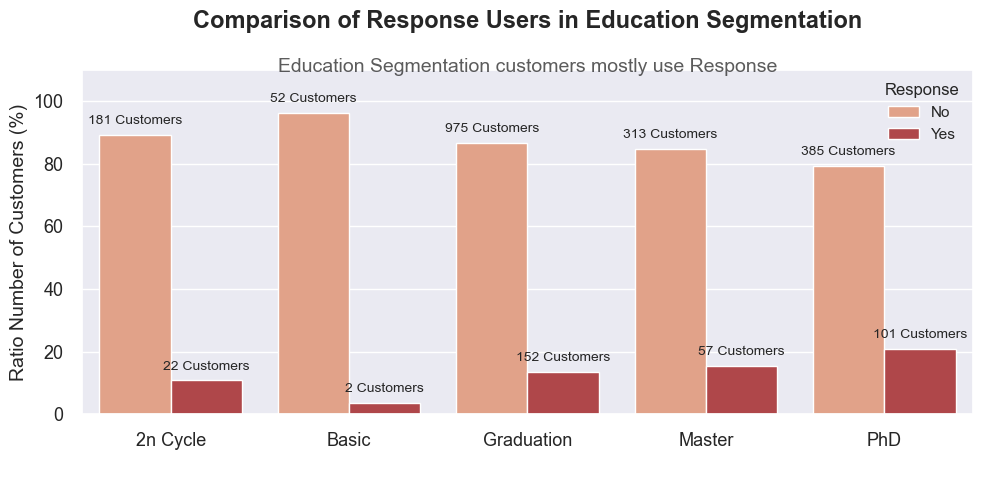

In [46]:
# plotting
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Education", y="ratio",
                 data=df_edu, hue="Response",
                 palette=list(sns.color_palette("RdBu"))[::-1][-2:])

# set values label annotation
for p in ax.patches:
    ratio_height = p.get_height()
    ncus = df_edu[df_edu["ratio"] == ratio_height]["nISCustomer"].values
    if len(ncus) > 0:
        ncus = ncus[0]
        ax.annotate(
            f'{ncus} Customers',
            (p.get_x() + p.get_width() / 2., ratio_height),
            ha='center',
            va='center',
            xytext=(0, 10),
            fontsize=10,
            textcoords='offset points')

# set title
plt.ylabel('Ratio Number of Customers (%)', fontsize=14)
plt.xlabel(' ', fontsize=14)
plt.title("Comparison of Response Users in Education Segmentation",
          fontsize=17, fontweight='bold', pad=30)

# set info
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = "Education Segmentation customers mostly use Response"
ax.text((x_start + x_end) / 2, y_end * 1.08, desc,
        ha='center', fontsize=14, alpha=0.75)

# setting ticks
plt.tick_params(axis='both', which='major', labelsize=13)
plt.ylim(0, 110)

plt.tight_layout()
plt.show()

In [47]:
# Group data by Education and Complain
df_g = df.groupby(["Education", "Complain"]).agg({"ID": "nunique"}).reset_index()
df_g.rename(columns={"ID": "nISCustomer"}, inplace=True)

# Group data by Education
df_g1 = df.groupby(["Education"]).agg({"ID": "nunique"}).reset_index()
df_g1.rename(columns={"ID": "nCustomer"}, inplace=True)

# Merge data
df_edu_comp = df_g.merge(df_g1, on="Education")

# Calculate ratio
df_edu_comp["ratio"] = (df_edu_comp["nISCustomer"] / df_edu_comp["nCustomer"]) * 100

# Set labels for Response
df_edu_comp["Complain"] = df_edu_comp["Complain"].apply(lambda x: "Yes" if x == 1 else "No")

df_edu_comp

,Education,Complain,nISCustomer,nCustomer,ratio
0,2n Cycle,No,199,203,98.029557
1,2n Cycle,Yes,4,203,1.970443
2,Basic,No,54,54,100.000000
3,Graduation,No,1113,1127,98.757764
4,Graduation,Yes,14,1127,1.242236
5,Master,No,368,370,99.459459
6,Master,Yes,2,370,0.540541
7,PhD,No,485,486,99.794239
8,PhD,Yes,1,486,0.205761


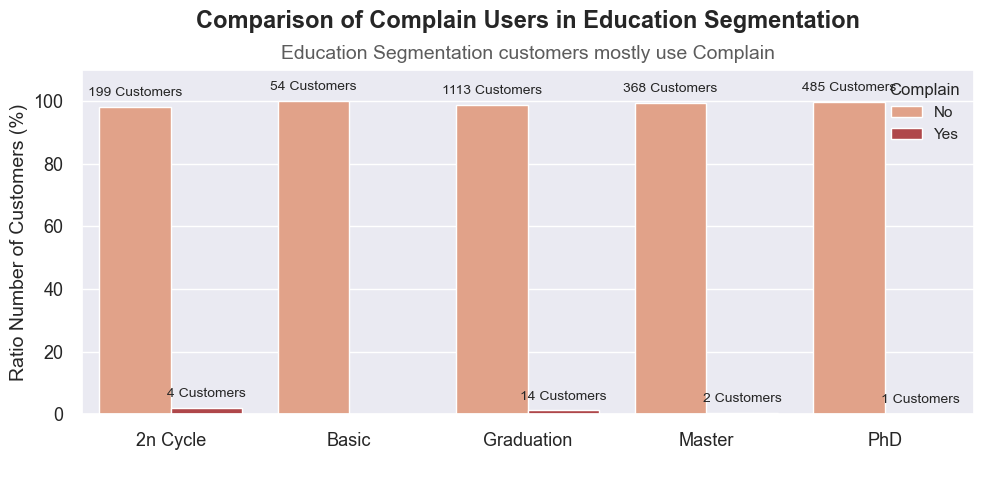

In [48]:
# plotting
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Education", y="ratio",
                 data=df_edu_comp, hue="Complain",
                 palette=list(sns.color_palette("RdBu"))[::-1][-2:])

# set values label annotation
for p in ax.patches:
    ratio_height = p.get_height()
    ncus = df_edu_comp[df_edu_comp["ratio"] == ratio_height]["nISCustomer"].values
    if len(ncus) > 0:
        ncus = ncus[0]
        ax.annotate(
            f'{ncus} Customers',
            (p.get_x() + p.get_width() / 2., ratio_height),
            ha='center',
            va='center',
            xytext=(0, 10),
            fontsize=10,
            textcoords='offset points')

# set title
plt.ylabel('Ratio Number of Customers (%)', fontsize=14)
plt.xlabel(' ', fontsize=14)
plt.title("Comparison of Complain Users in Education Segmentation",
          fontsize=17, fontweight='bold', pad=30)

# set info
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = "Education Segmentation customers mostly use Complain"
ax.text((x_start + x_end) / 2, y_end * 1.08, desc,
        ha='center', fontsize=14, alpha=0.75)

# setting ticks
plt.tick_params(axis='both', which='major', labelsize=13)
plt.ylim(0, 110)

plt.tight_layout()
plt.show()